# s-curves

S-curves are used to model growth or progress of many processes over time (e.g. project completion, population growth, pandemic spread, etc.). The shape of the curve looks very similar to the letter `s`, hence, the name, `s-curve`. There are [many functions](https://en.wikipedia.org/wiki/Sigmoid_function) that may be used to generate a s-curve. The [logistic function](https://en.wikipedia.org/wiki/Logistic_function) is one of common function to generate a s-curve. The simplified (standard) logistic function is defined as follows.

$f(x) = \frac{1}{1 + e^{-x}}$

A parameterized logistic function is defined as follows.

$f(x) = \frac{L}{1 + e^{-k(x - x_0)}}$

Where

* $L$ is the curve's maximum value
* $x_0$ is the midpoint of the sigmoid
* $k$ is the `logistic growth rate` or `steepness of the curve`
* $x$ is the input

## Basic s-curve

Let's generate a basic s-curve using `scipy's` builtin `expit` function.

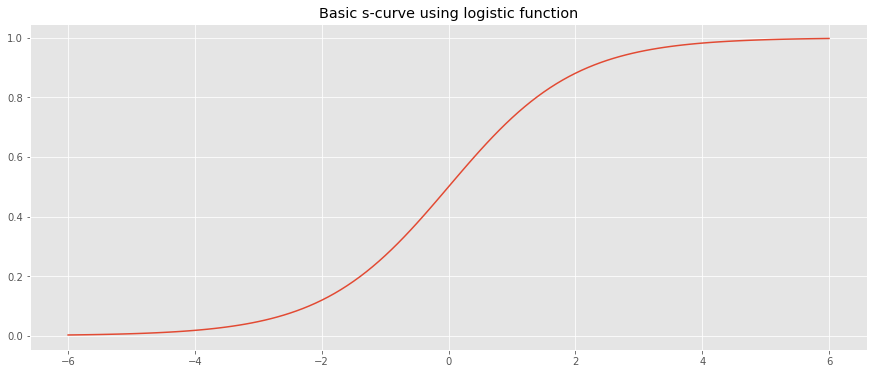

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit as logistic
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

x = np.arange(-6, 6.1, 0.1)
y = logistic(x)

fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x, y)
_ = ax.set_title('Basic s-curve using logistic function')

If our domain is not negative, we may shift the s-curve to the right (x-axis) by adding 6.

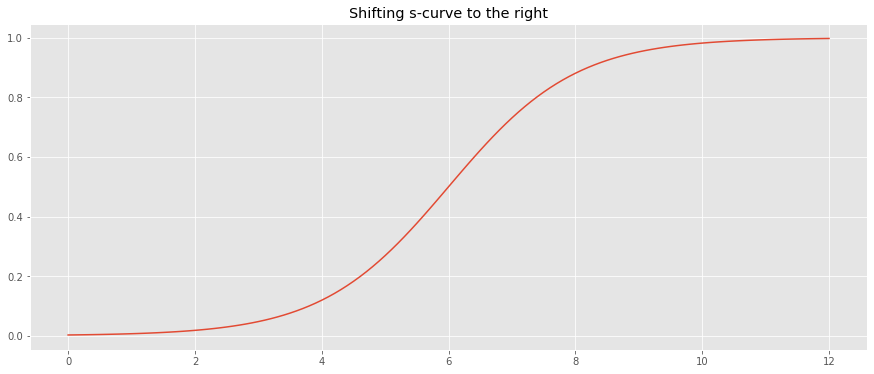

In [2]:
x = np.arange(-6, 6.1, 0.1)
y = logistic(x)

fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x + 6.0, y)
_ = ax.set_title('Shifting s-curve to the right')

## Parameterized s-curve

Let's create our own logistic function that is parameterized by $L$, $x_0$ and $k$.

### Vary $x_0$

Let's vary $x_0$ while holding $L=1$ and $k=1$.

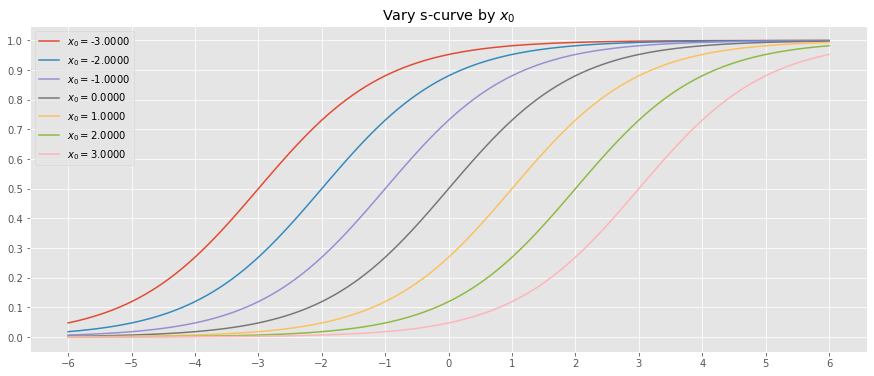

In [3]:
def logistic(x, L=1, x_0=0, k=1):
    return L / (1 + np.exp(-k * (x - x_0)))

x = np.arange(-6, 6.1, 0.1)
y_outputs = [(x_0, logistic(x, L=1, x_0=x_0, k=1)) for x_0 in np.arange(-3.0, 3.1, 1.0)]

fig, ax = plt.subplots(figsize=(15, 6))

for (x_0, y) in y_outputs:
    _ = ax.plot(x, y, label=fr'$x_0=${x_0:.4f}')
    
_ = ax.set_title(r'Vary s-curve by $x_0$')
_ = ax.legend()
_ = ax.set_xticks(np.arange(-6, 6.1, 1))
_ = ax.set_yticks(np.arange(0, 1.1, 0.1))

### Vary $L$

Let's vary $L$ while holding $x_0=0$ and $k=1$.

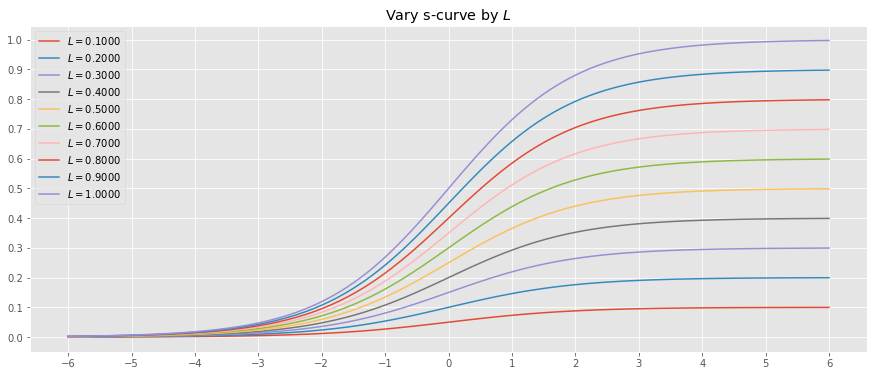

In [4]:
x = np.arange(-6, 6.1, 0.1)
y_outputs = [(L, logistic(x, L=L, x_0=0, k=1)) for L in np.arange(0.1, 1.1, 0.1)]

fig, ax = plt.subplots(figsize=(15, 6))

for (L, y) in y_outputs:
    _ = ax.plot(x, y, label=fr'$L=${L:.4f}')
    
_ = ax.set_title(r'Vary s-curve by $L$')
_ = ax.legend()
_ = ax.set_xticks(np.arange(-6, 6.1, 1))
_ = ax.set_yticks(np.arange(0, 1.1, 0.1))

### Vary k

Let's vary $k$ while holding $L=1$ and $x_0=0$.

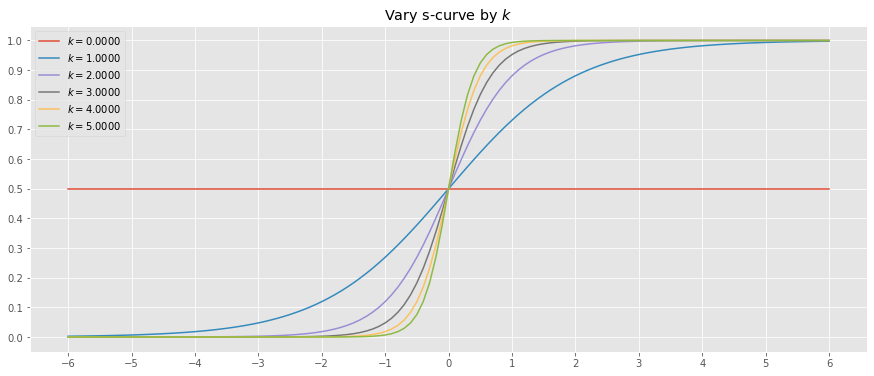

In [5]:
x = np.arange(-6, 6.1, 0.1)
y_outputs = [(k, logistic(x, L=1.0, x_0=0, k=k)) for k in np.arange(0.0, 5.5, 1.0)]

fig, ax = plt.subplots(figsize=(15, 6))

for (k, y) in y_outputs:
    _ = ax.plot(x, y, label=fr'$k=${k:.4f}')
    
_ = ax.set_title(r'Vary s-curve by $k$')
_ = ax.legend()
_ = ax.set_xticks(np.arange(-6, 6.1, 1))
_ = ax.set_yticks(np.arange(0, 1.1, 0.1))

## Curve-fitting

We may attempt to fit a s-curve to datapoints. First, let's generate some data from the logistic function with $L=1$, $x_0=0$ and $k=1$ (the standard logistic function).

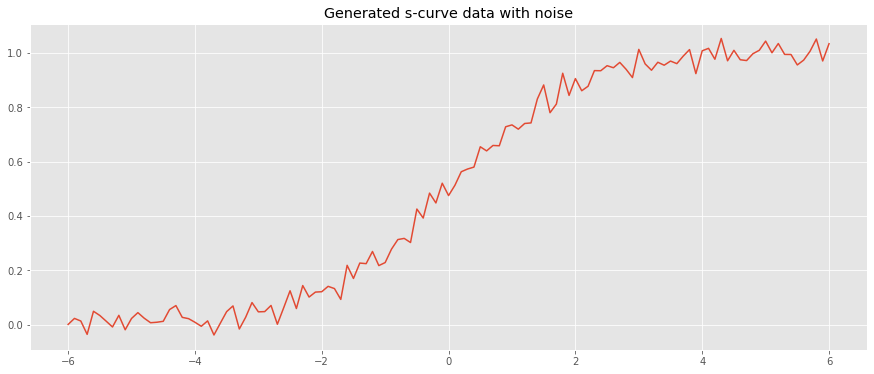

In [6]:
x = np.arange(-6, 6.1, 0.1)
y = logistic(x) + np.random.normal(loc=0.0, scale=0.03, size=len(x))

fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x, y)
_ = ax.set_title('Generated s-curve data with noise')

Now, let's use scipy's [curv_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) function to learn the parameters $L$, $x_0$ and $k$. Note that we have to provide intelligent initial guesses for `curv_fit` to work. Our initial guesses are placed in `p_0`.

* $L$ is guessed to be the max of the observed `y` values.
* $x_0$ is guessed to be the median of the observed `x` values.
* $k$ is guessed to be 1.0.

In [7]:
from scipy.optimize import curve_fit

L_estimate = y.max()
x_0_estimate = np.median(x)
k_estimate = 1.0

p_0 = [L_estimate, x_0_estimate, k_estimate]

popt, pcov = curve_fit(logistic, x, y, p_0, method='dogbox')

The output of `curv_fit` is a tuple.

* `popt` stores the optimized parameters to the `logistic` function minimizing the loss.
* `pcov` is the estimated covariance of `popt` (see documentation for more details).

In [8]:
popt

array([1.00831529, 0.02236325, 0.98162872])

In [9]:
pcov

array([[ 3.94004406e-05,  1.18785056e-04, -8.60218904e-05],
       [ 1.18785056e-04,  9.27259220e-04, -2.59344691e-04],
       [-8.60218904e-05, -2.59344691e-04,  5.98041077e-04]])

Let's plot the results.

* `y_truth` is the generated data
* `y` is y_truth with noise added
* `y_pred` is the predicted data as a result of curve fitting

As you can see, y_truth and y_pred are very close!

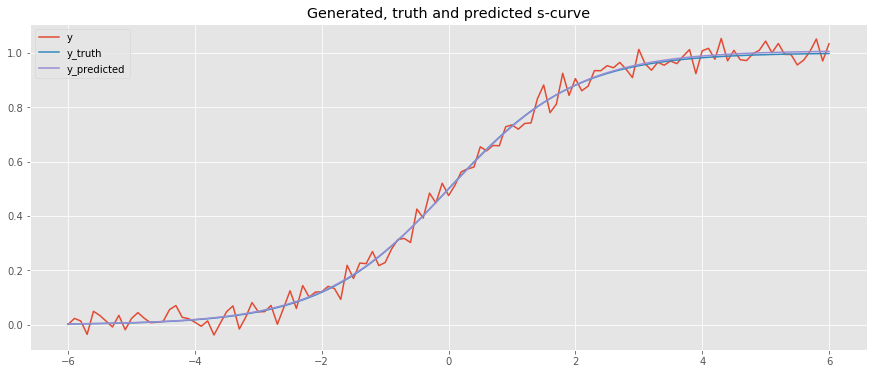

In [10]:
y_truth = logistic(x, L=1, x_0=0, k=1)
y_pred = logistic(x, L=popt[0], x_0=popt[1], k=popt[2])

fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x, y, label='y')
_ = ax.plot(x, y_truth, label='y_truth')
_ = ax.plot(x, y_pred, label='y_predicted')
_ = ax.set_title('Generated, truth and predicted s-curve')
_ = ax.legend()

Here, we generate data with $L=1$, $x_0=-2.0$ and $k=3$ and use curve fitting to predict.

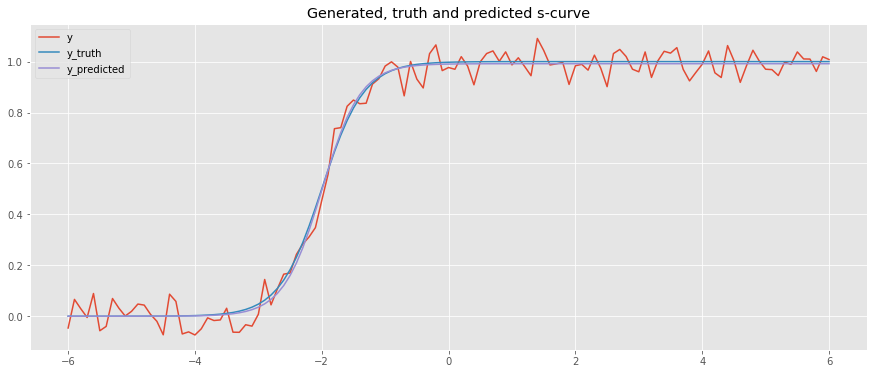

In [11]:
x = np.arange(-6, 6.1, 0.1)
y_truth = logistic(x, L=1, x_0=-2.0, k=3)
y = y_truth + np.random.normal(loc=0.0, scale=0.05, size=len(x))

p_0 = [y.max(), np.median(x), 1.0]
popt, pcov = curve_fit(logistic, x, y, p_0, method='dogbox')

y_pred = logistic(x, L=popt[0], x_0=popt[1], k=popt[2])

fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x, y, label='y')
_ = ax.plot(x, y_truth, label='y_truth')
_ = ax.plot(x, y_pred, label='y_predicted')
_ = ax.set_title('Generated, truth and predicted s-curve')
_ = ax.legend()

## S-curve prediction

What if we had a set of s-curves that we want to predict? Let's generate some data.

In [12]:
from collections import namedtuple
from numpy.random import choice

Data = namedtuple('Data', 'x y_truth y y_pred popt')

def generate_data(L, x_0, k, noise_loc=0.0, noise_scale=0.02):
    x = np.arange(-6, 6.1, 0.1)
    y_truth = logistic(x, L=L, x_0=x_0, k=k)
    y = y_truth + np.random.normal(loc=noise_loc, scale=noise_scale, size=len(x))
    

    p_0 = [y.max(), np.median(x), 1.0]
    popt, pcov = curve_fit(logistic, x, y, p_0, method='dogbox')

    y_pred = logistic(x, L=popt[0], x_0=popt[1], k=popt[2])
    
    return Data(x, y_truth, y, y_pred, popt)

L = 1.0
x_0 = np.arange(-3.0, 3.1, 1.0)
k = np.arange(1.0, 5.5, 1.0)
noise_loc = 0.0
noise_scale = np.arange(0.001, 0.01, 0.0001)

data = [generate_data(L, choice(x_0), choice(k), noise_loc, choice(noise_scale)) for _ in range(100)]

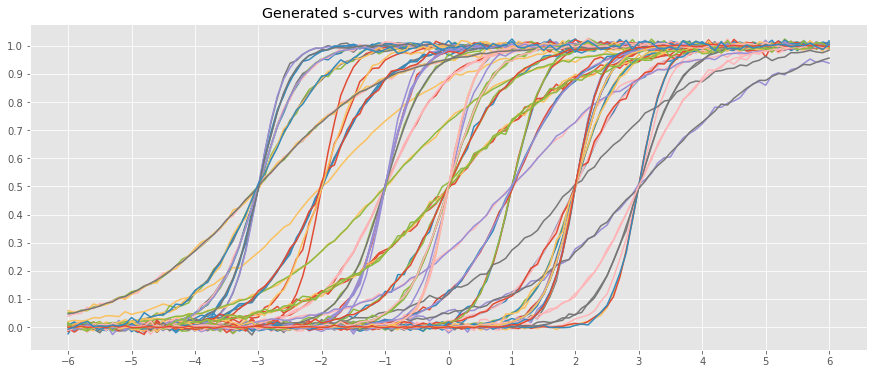

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))

for d in data:
    _ = ax.plot(d.x, d.y)
    
_ = ax.set_title('Generated s-curves with random parameterizations')
_ = ax.set_xticks(np.arange(-6, 6.1, 1))
_ = ax.set_yticks(np.arange(0, 1.1, 0.1))

If we had the sample curves above, how would we predict new data points? A naive approach would be to average over the learned parameters and use the averaged parameters to predict new data points. As can be seen below, this one model will have horrible predictions.

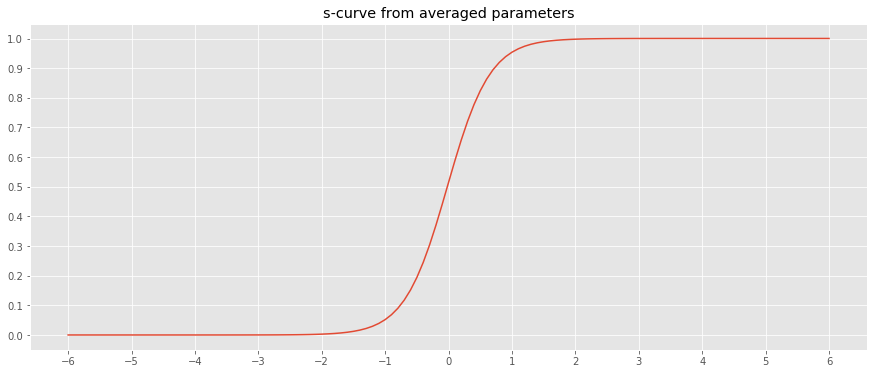

In [17]:
opts = np.array([d.popt for d in data]).mean(axis=0)

x = np.arange(-6, 6.1, 0.1)
y_pred = logistic(x, L=opts[0], x_0=opts[1], k=opts[2])

fig, ax = plt.subplots(figsize=(15, 6))
_ = ax.plot(x, y_pred)
_ = ax.set_title('s-curve from averaged parameters')
_ = ax.set_xticks(np.arange(-6, 6.1, 1))
_ = ax.set_yticks(np.arange(0, 1.1, 0.1))

Even if we averaged the observed curves and then apply curve fitting, the predictions will be off by a huge margin.